In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
print((train_x.shape, train_y.shape,test_x.shape, test_y.shape))

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))


label is 4


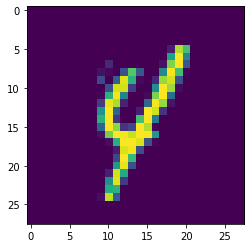

In [3]:
index = 3457
print('label is %d' % train_y[index])
plt.imshow(train_x[index])
plt.show()

In [4]:
np.min(train_x[index]), np.max(train_x[index]), np.mean(train_x[index])

(0, 255, 19.855867346938776)

In [5]:
train_x_1 = train_x.reshape(len(train_x), -1)
print(train_x_1.shape)

test_x_1 = test_x.reshape(len(test_x), -1)
print(test_x_1.shape)

(60000, 784)
(10000, 784)


In [6]:
class DummyClassifier(object):
    def __init__(self):
        self.name = 'Dummy'
    def fit(self, train_x, train_y):
        pass
    def predict(self, test_x):
        return np.random.randint(low=0, high=10, size=len(test_x))
    
    

In [18]:
classifier = DummyClassifier()
classifier.fit(train_x_1, train_y_1)
pred = classifier.predict(test_x_1)

In [20]:
def accuracy(pred, gt):
    return np.sum(pred == gt)/len(gt)

In [21]:
acc = accuracy(pred, test_y)
print(acc)

0.0982


In [23]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(pred, test_y)

0.0982

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
results = []
for k in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_x_1[:2000], train_y[:2000])
    pred = classifier.predict(test_x_1[:100])
    acc = accuracy_score(pred, test_y[:100])
    results.append(acc)
    print(k, acc)

1 0.86
3 0.9
5 0.9
7 0.89
9 0.9


In [35]:
results = []
for k in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_x_1[:3000], train_y[:3000])
    pred = classifier.predict(test_x_1[:100])
    acc = accuracy_score(pred, test_y[:100])
    results.append(acc)
    print(k, acc)

1 0.89
3 0.94
5 0.93
7 0.9
9 0.9


In [36]:
results = []
for k in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_x_1[:10000], train_y[:10000])
    pred = classifier.predict(test_x_1[:100])
    acc = accuracy_score(pred, test_y[:100])
    results.append(acc)
    print(k, acc)

1 0.92
3 0.95
5 0.95
7 0.94
9 0.96


In [39]:
from sklearn.cluster import KMeans

In [42]:
km = KMeans(n_clusters=20)
km.fit(train_x_1[:10000])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

#### Задача 1

Улучшить класс DummyClassifier. Преодолеть хотя бы 25%, не используя scikit -learn и другие библиотеки машинного обучения.

#### Задача 2

Найти 10/20/30/50/ 100 эталонов, чтобы качество классификации было максимальным. (Преодолеть 70%)

#### Дедлайн: до 23:59:59 13 октября
#### На почту mlcoursemm@gmail.com с темой письма ML2020Seminar02 

In [8]:
from sklearn.neighbors import KNeighborsClassifier

class Classifier10(object):
    def __init__(self):
        self.name = 'dummy'
    def fit(self, train_x, train_y):
        self.etalons = []
        self.labels = []
        for i in range(10):
            etalon = np.mean(train_x[train_y==i], axis=0)
            self.etalons.append(etalon)
            plt.imshow(etalon.reshape(28, 28))
            plt.show()
            self.labels.append(i)
        self.knn = KNeighborsClassifier(n_neighbors=1)
        self.knn.fit(self.etalons, self.labels)
    def predict(self, test_x):
        return self.knn.predict(test_x)

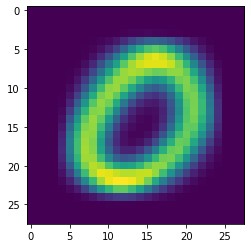

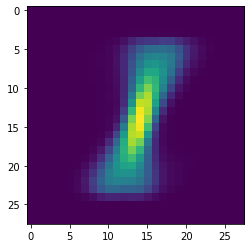

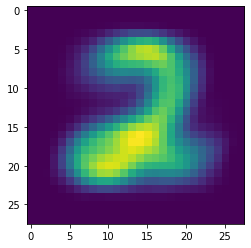

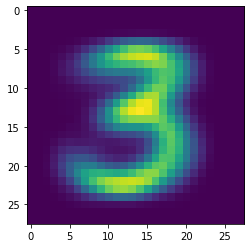

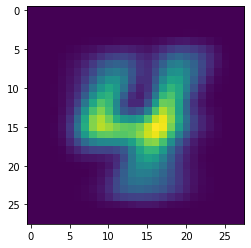

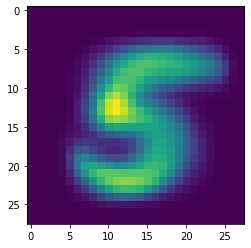

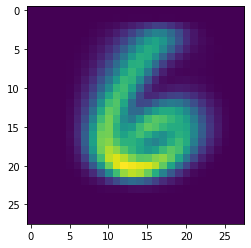

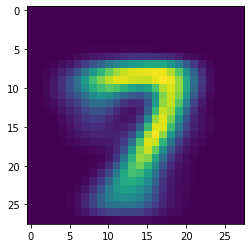

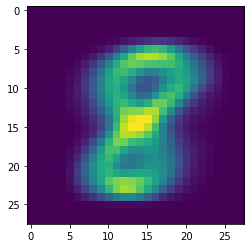

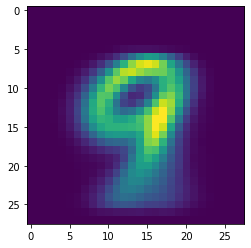

0.773


In [11]:
from sklearn.metrics import accuracy_score
classifier = Classifier10()
classifier.fit(train_x_1[:10000], train_y[:10000])
pred = classifier.predict(test_x_1[:1000])
acc = accuracy_score(pred, test_y[:1000])
print(acc)

In [14]:
from sklearn.cluster import KMeans
class Classifier20(object):
    def __init__(self, n_clusters=2):
        self.name = 'dummy'
        self.n_clusters = n_clusters
    def fit(self, train_x, train_y):
        self.etalons = []
        self.labels = []
        for i in range(10):
            km = KMeans(n_clusters=self.n_clusters)
            km.fit(train_x[train_y==i])
            for etalon in km.cluster_centers_:
                self.etalons.append(etalon)
                plt.imshow(etalon.reshape(28, 28))
                plt.show()
                self.labels.append(i)
        self.knn = KNeighborsClassifier(n_neighbors=1)
        self.knn.fit(self.etalons, self.labels)
    def predict(self, test_x):
        return self.knn.predict(test_x)

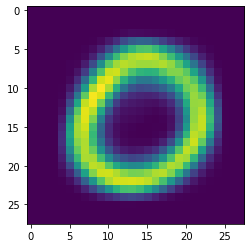

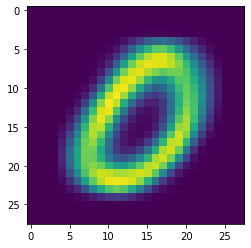

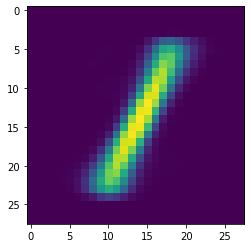

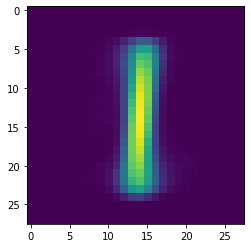

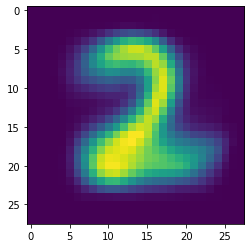

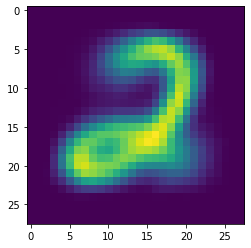

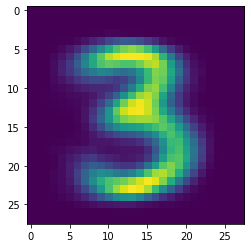

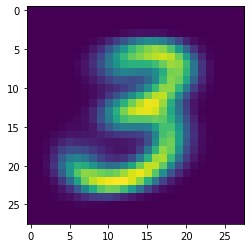

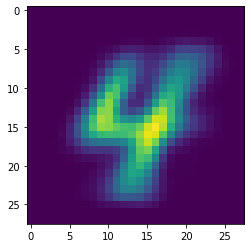

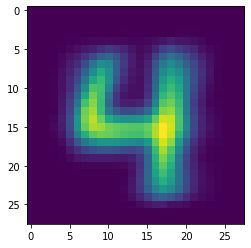

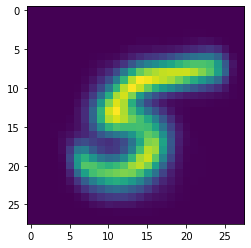

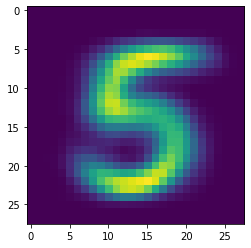

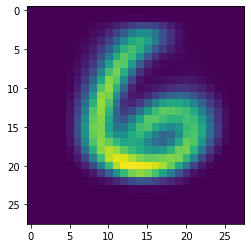

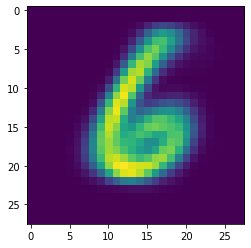

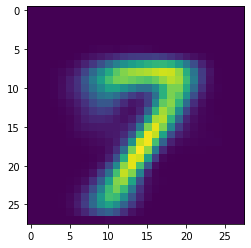

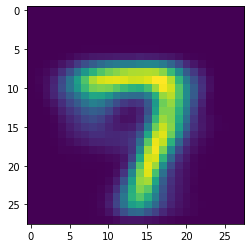

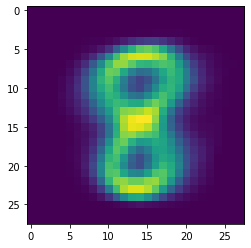

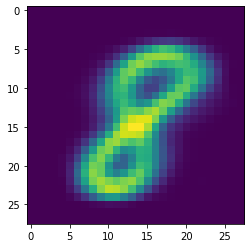

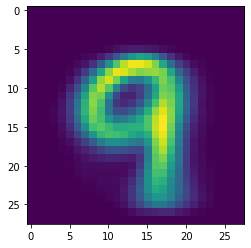

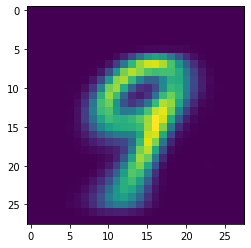

0.838


In [13]:
from sklearn.metrics import accuracy_score
classifier = Classifier20()
classifier.fit(train_x_1[:10000], train_y[:10000])
pred = classifier.predict(test_x_1[:1000])
acc = accuracy_score(pred, test_y[:1000])
print(acc)

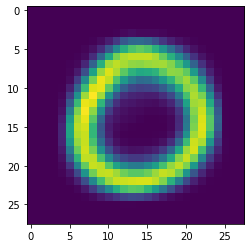

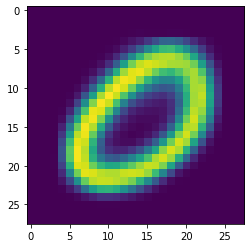

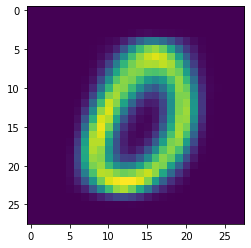

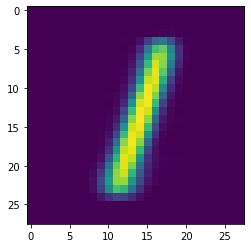

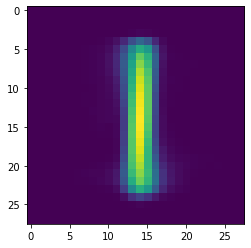

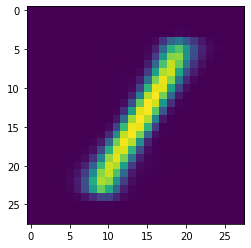

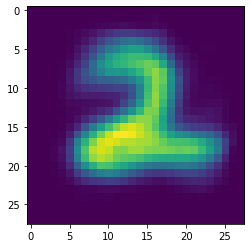

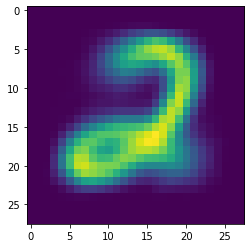

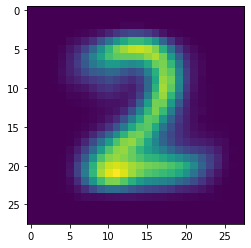

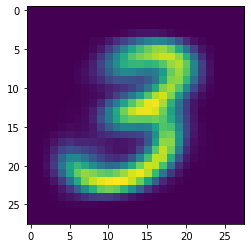

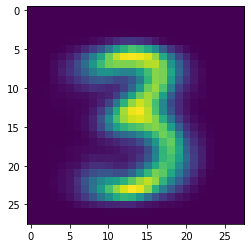

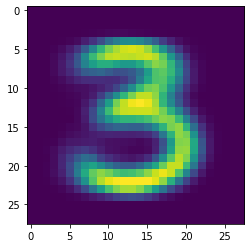

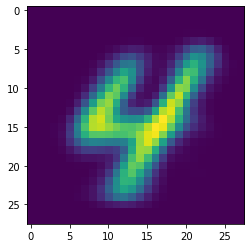

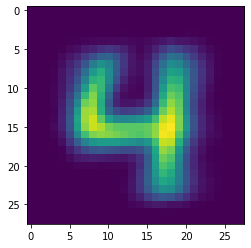

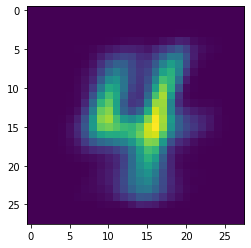

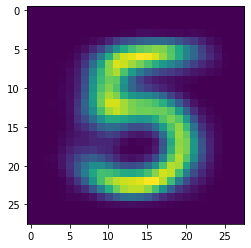

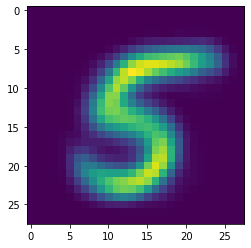

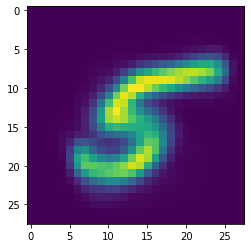

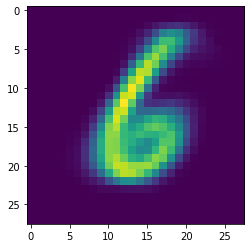

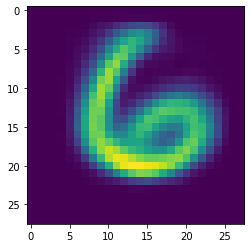

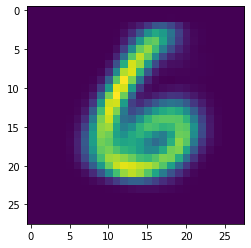

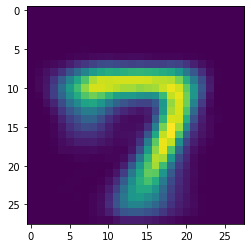

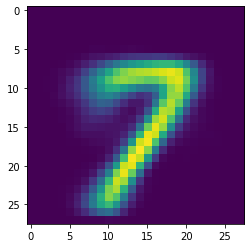

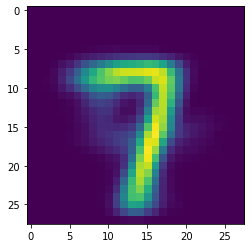

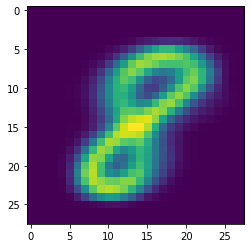

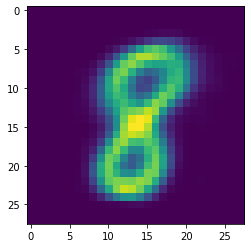

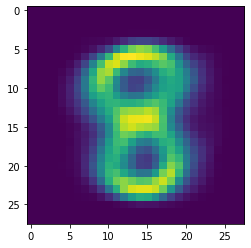

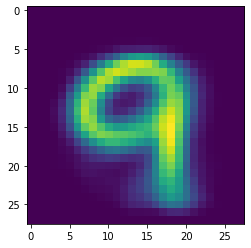

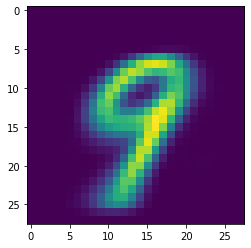

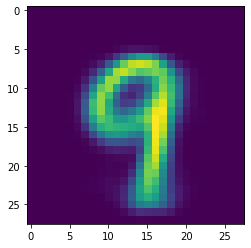

0.858


In [15]:
classifier = Classifier20(n_clusters=3)
classifier.fit(train_x_1[:10000], train_y[:10000])
pred = classifier.predict(test_x_1[:1000])
acc = accuracy_score(pred, test_y[:1000])
print(acc)

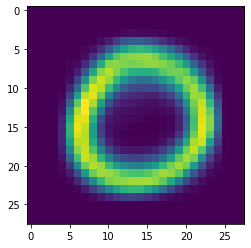

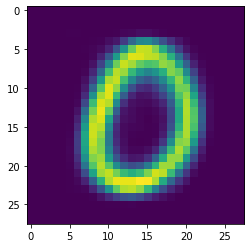

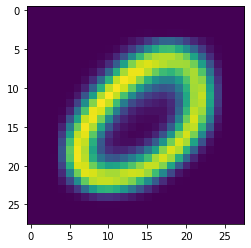

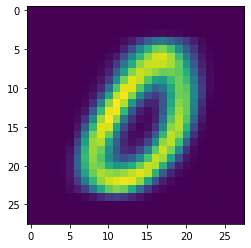

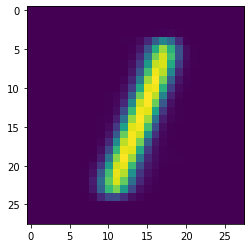

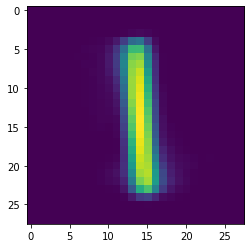

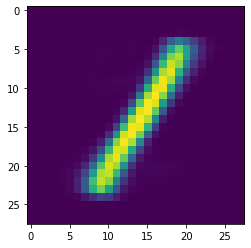

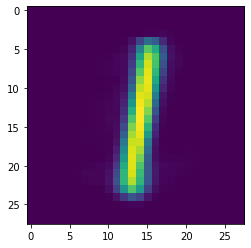

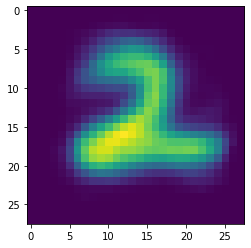

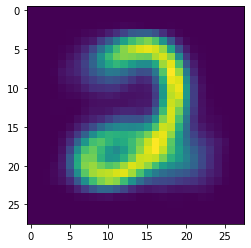

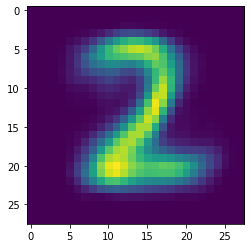

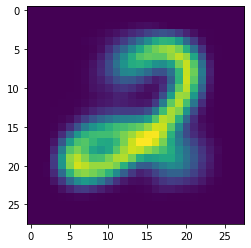

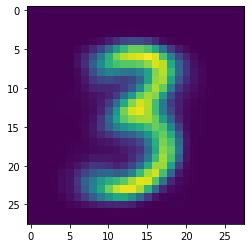

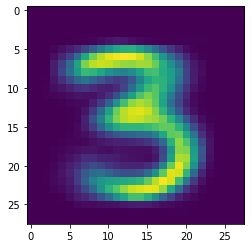

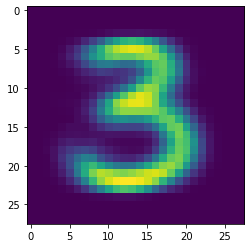

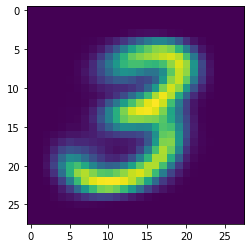

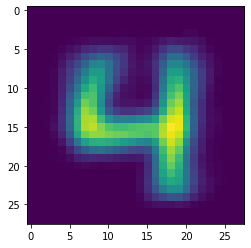

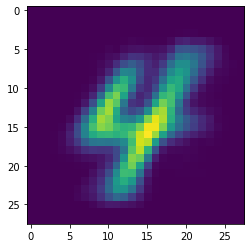

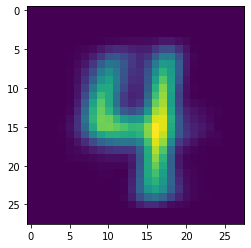

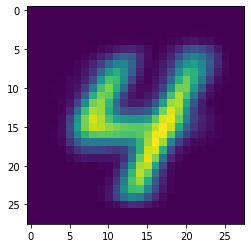

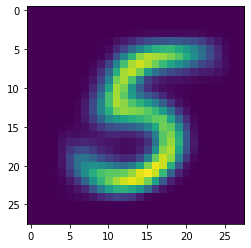

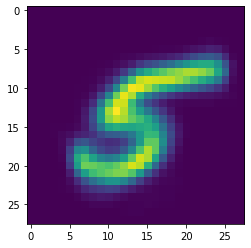

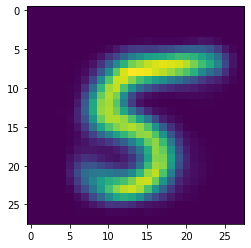

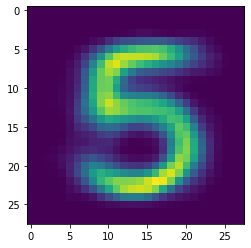

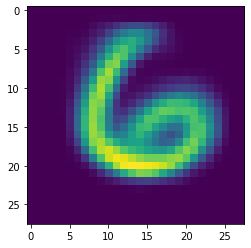

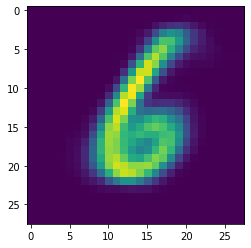

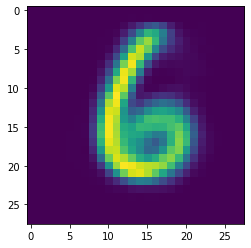

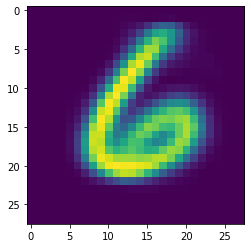

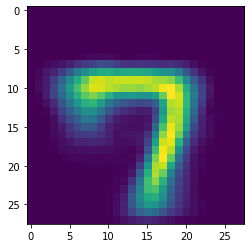

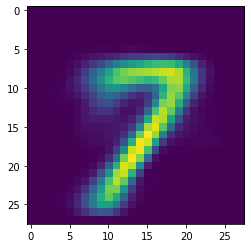

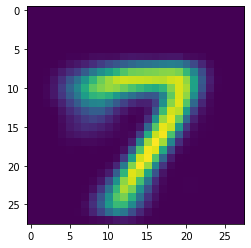

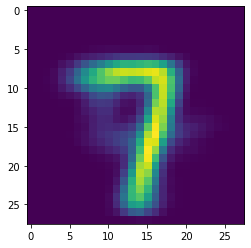

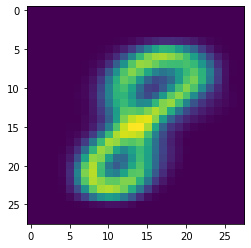

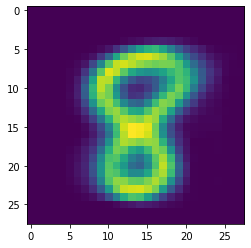

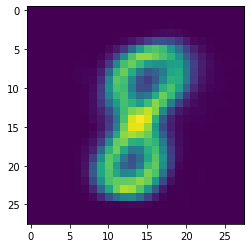

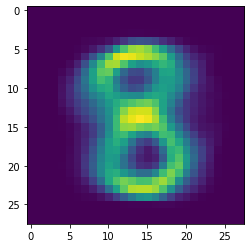

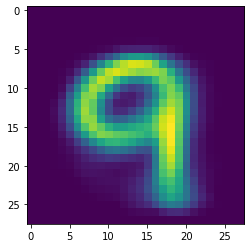

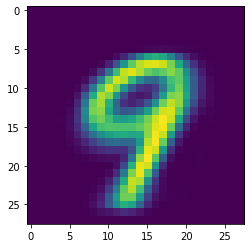

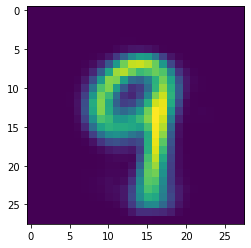

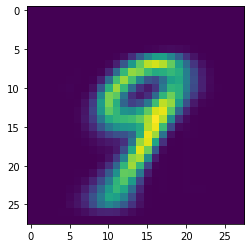

0.868


In [16]:
classifier = Classifier20(n_clusters=4)
classifier.fit(train_x_1[:10000], train_y[:10000])
pred = classifier.predict(test_x_1[:1000])
acc = accuracy_score(pred, test_y[:1000])
print(acc)

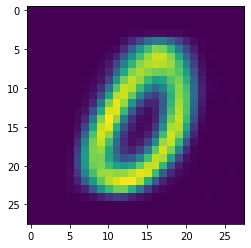

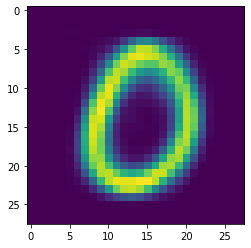

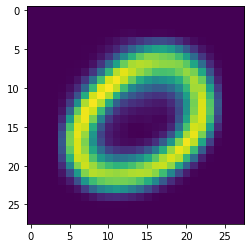

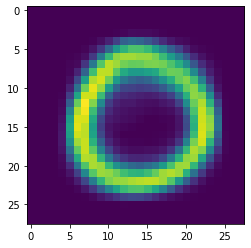

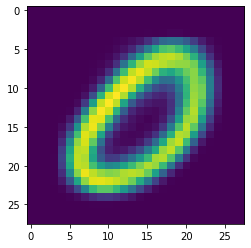

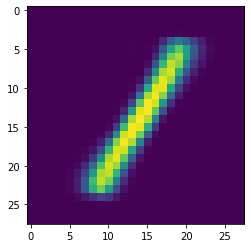

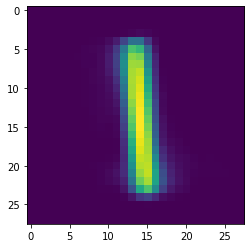

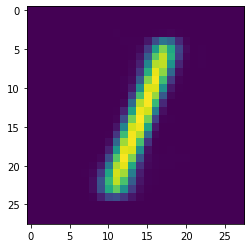

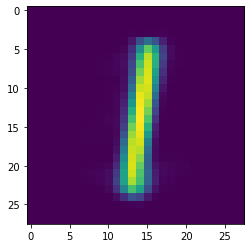

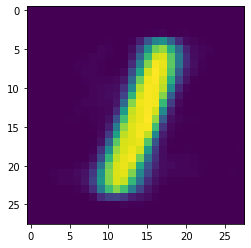

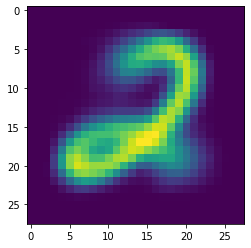

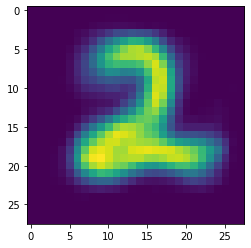

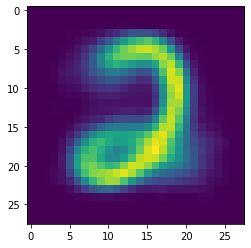

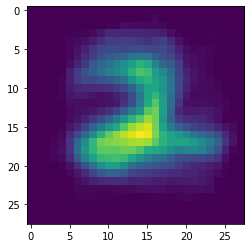

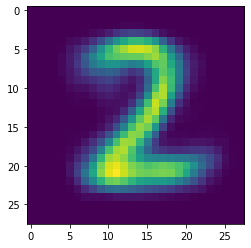

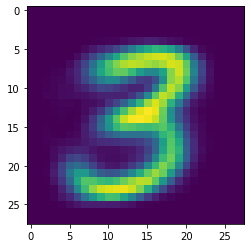

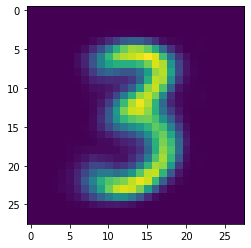

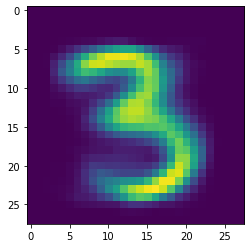

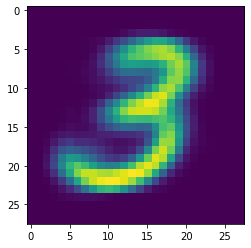

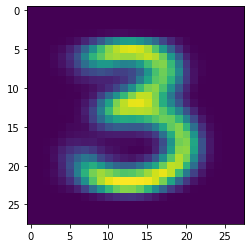

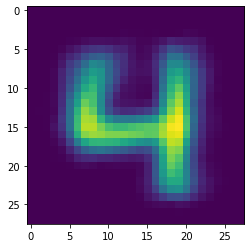

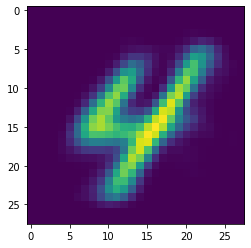

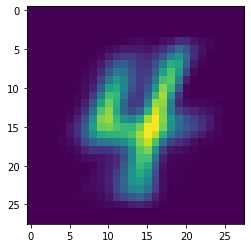

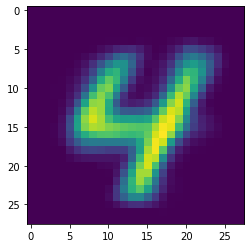

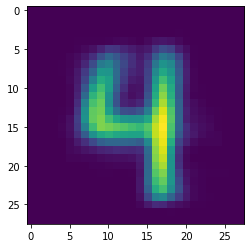

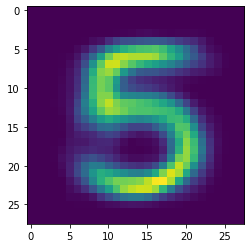

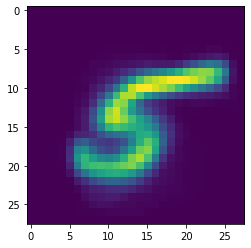

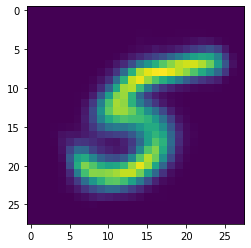

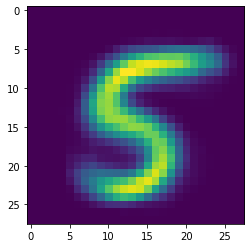

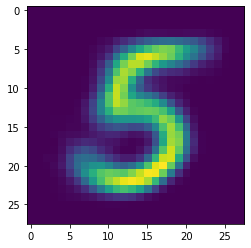

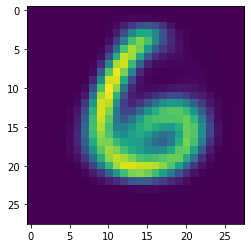

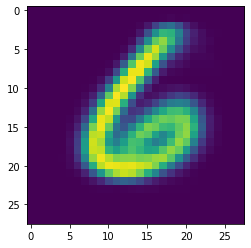

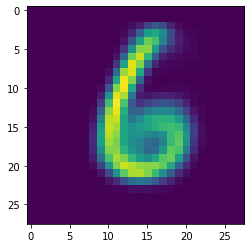

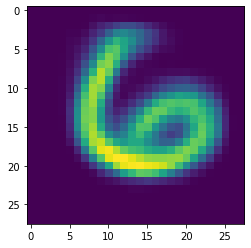

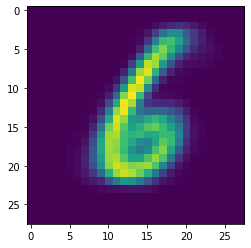

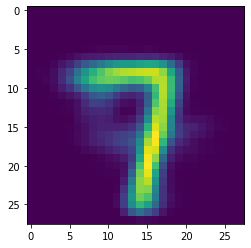

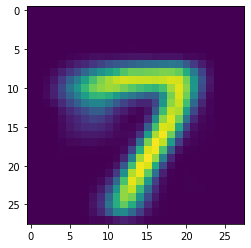

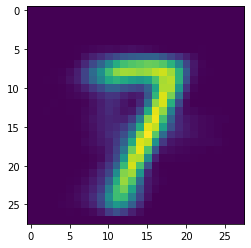

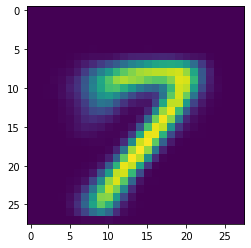

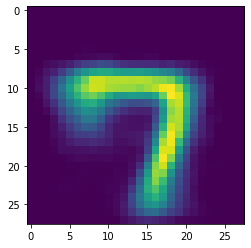

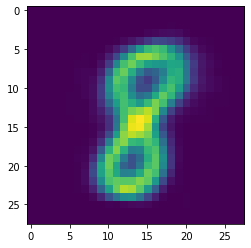

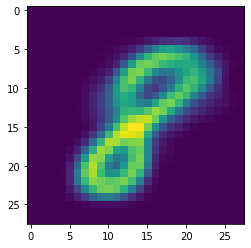

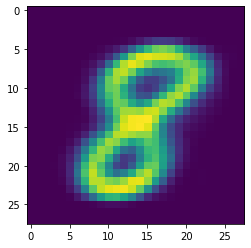

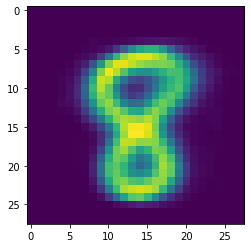

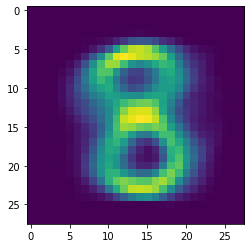

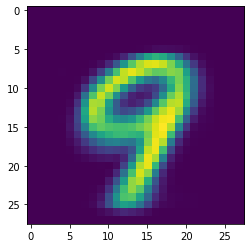

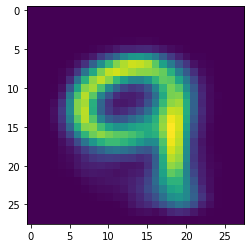

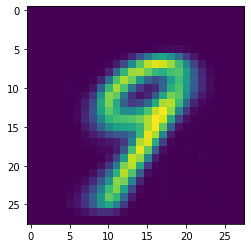

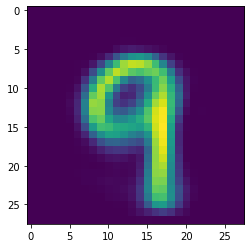

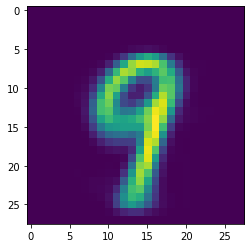

0.874


In [17]:
classifier = Classifier20(n_clusters=5)
classifier.fit(train_x_1[:10000], train_y[:10000])
pred = classifier.predict(test_x_1[:1000])
acc = accuracy_score(pred, test_y[:1000])
print(acc)

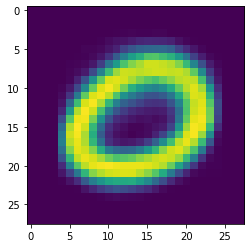

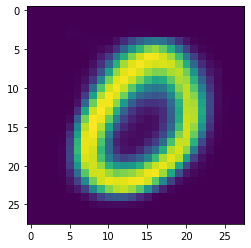

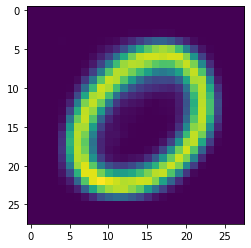

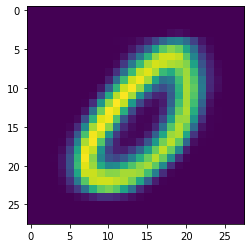

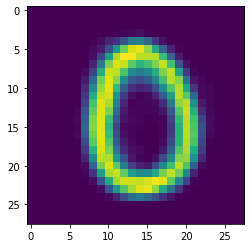

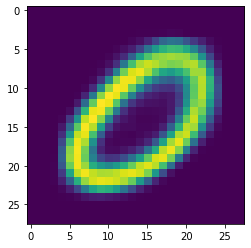

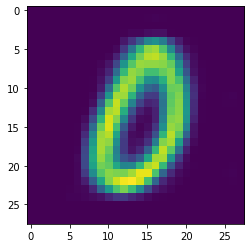

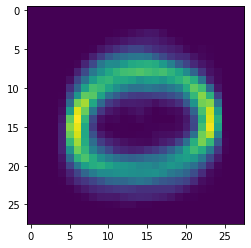

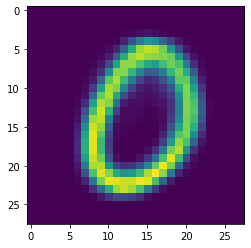

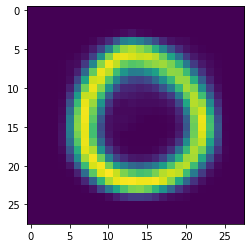

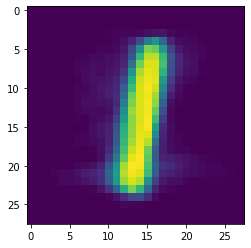

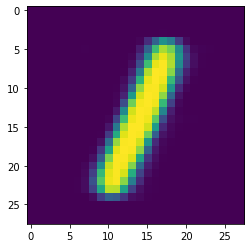

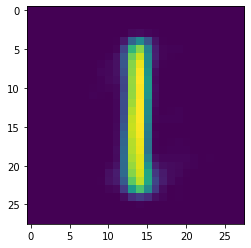

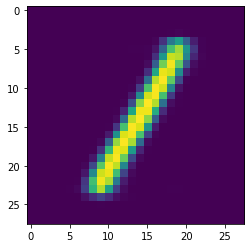

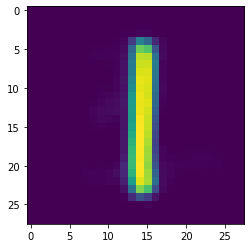

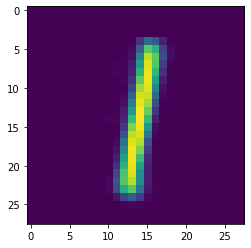

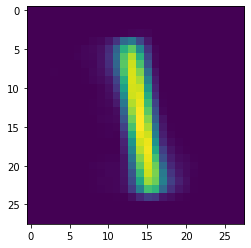

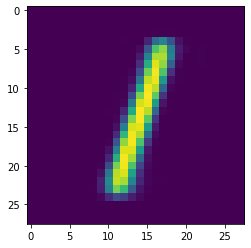

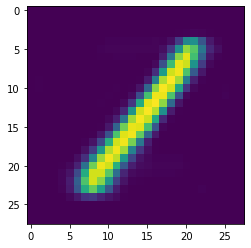

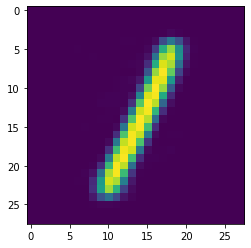

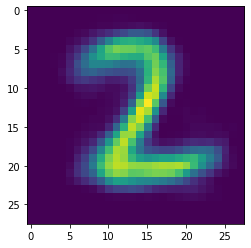

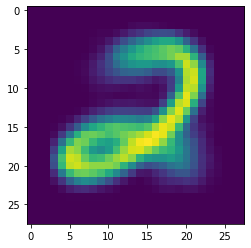

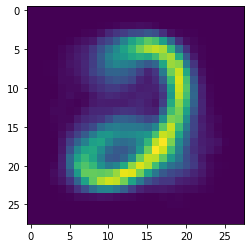

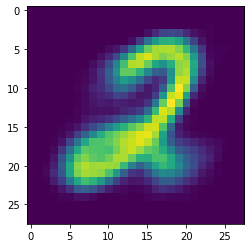

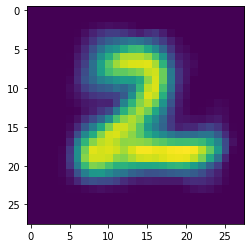

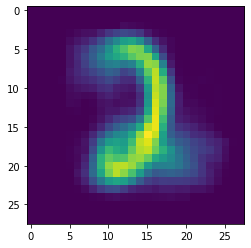

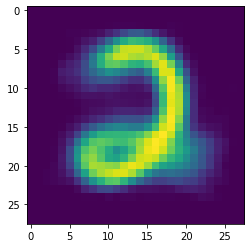

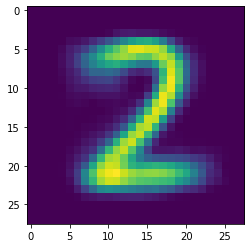

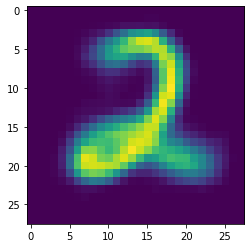

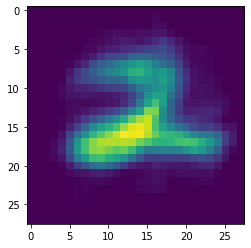

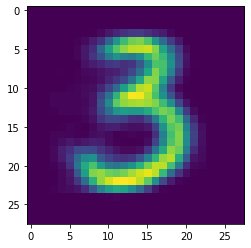

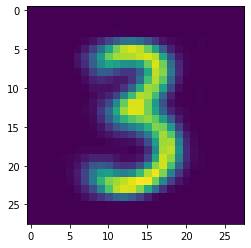

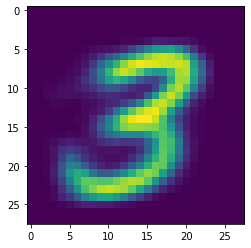

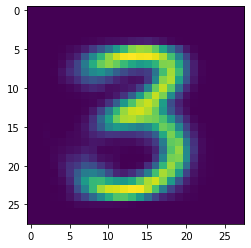

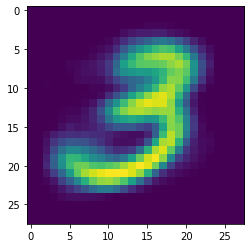

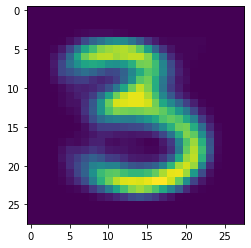

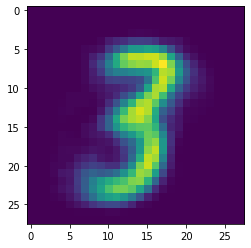

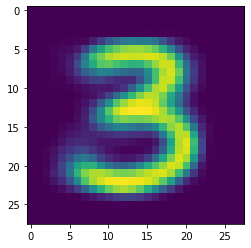

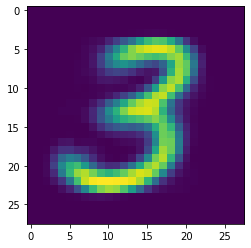

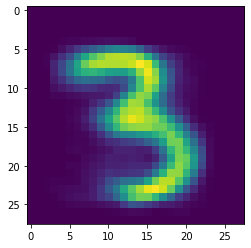

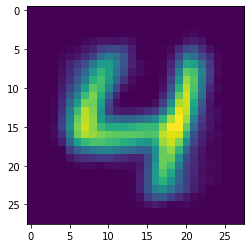

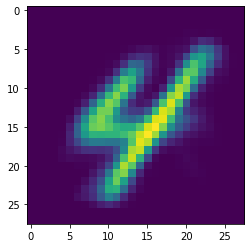

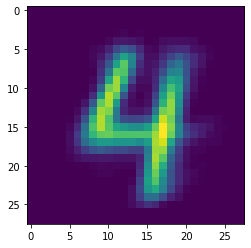

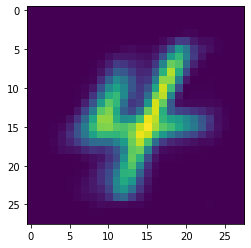

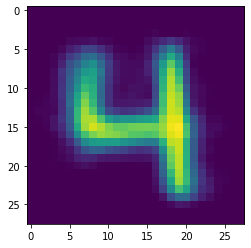

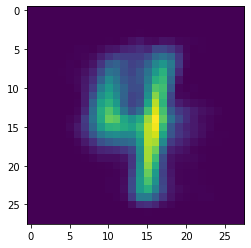

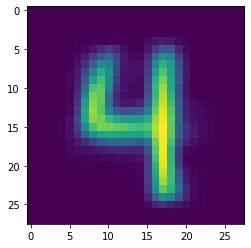

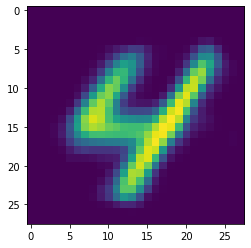

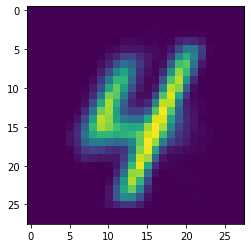

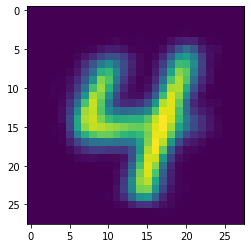

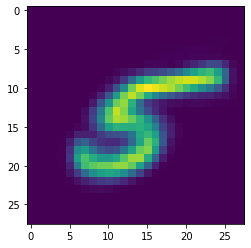

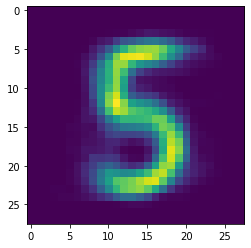

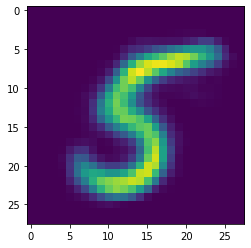

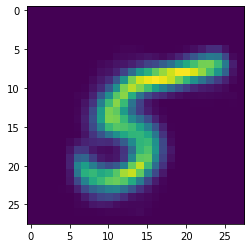

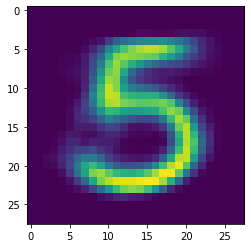

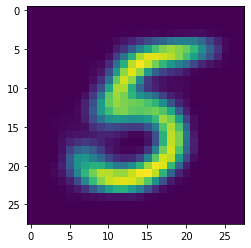

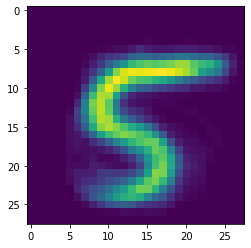

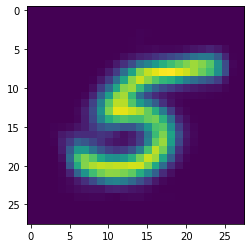

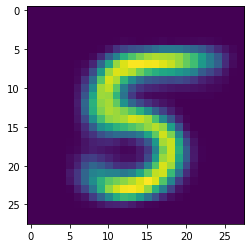

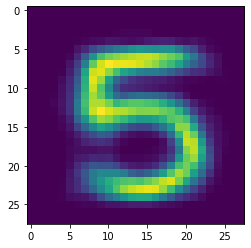

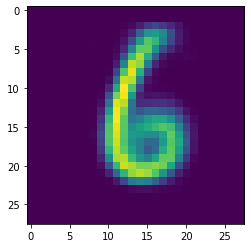

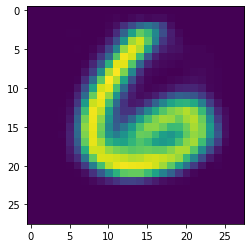

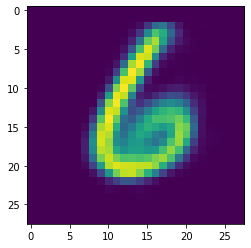

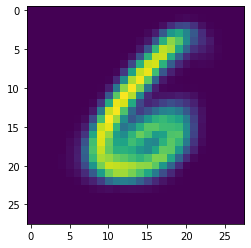

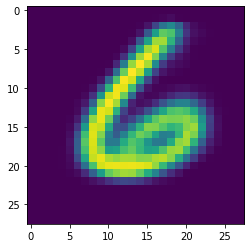

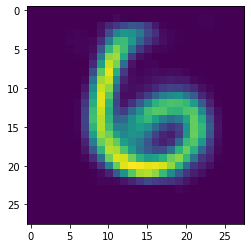

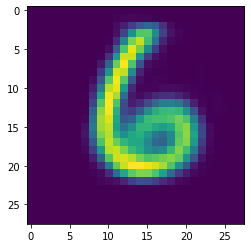

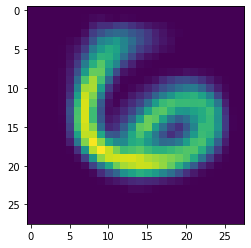

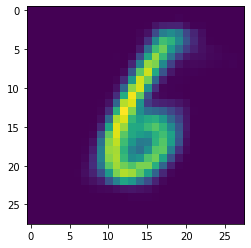

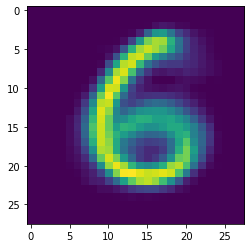

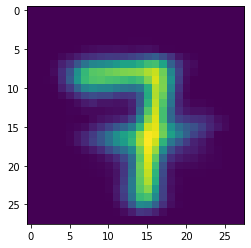

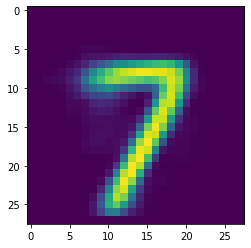

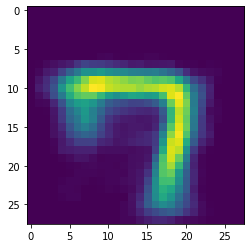

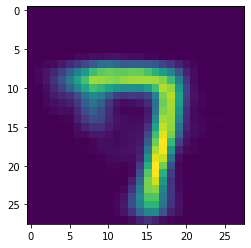

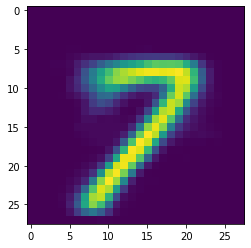

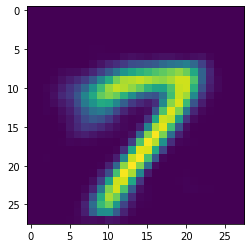

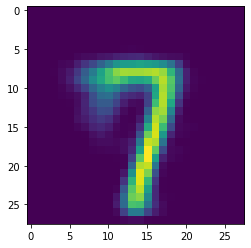

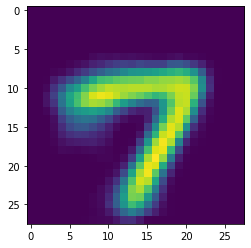

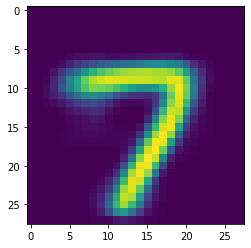

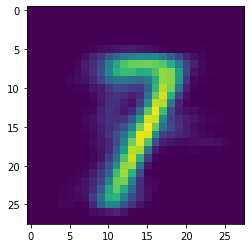

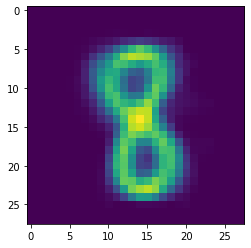

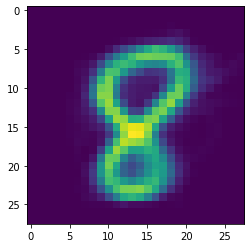

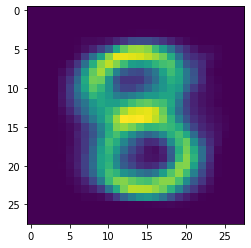

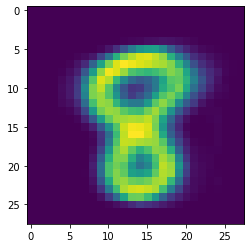

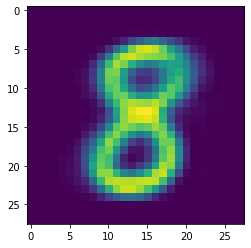

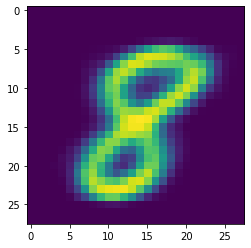

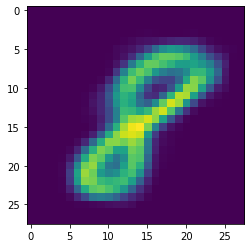

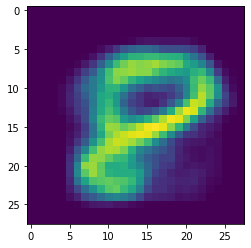

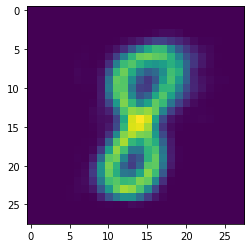

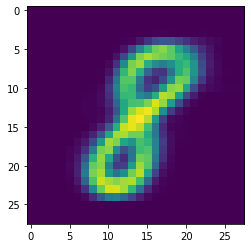

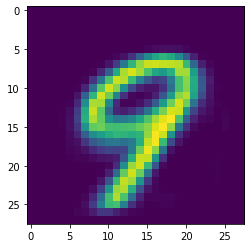

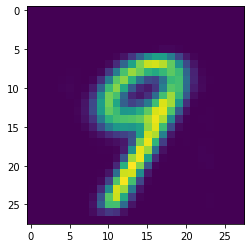

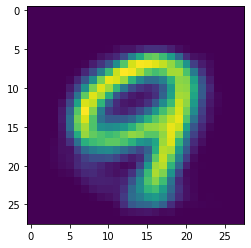

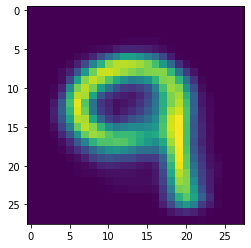

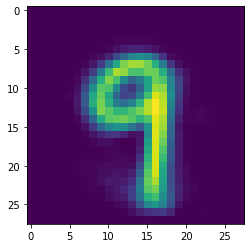

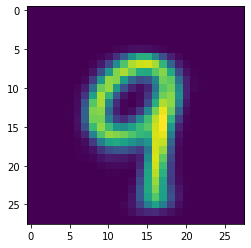

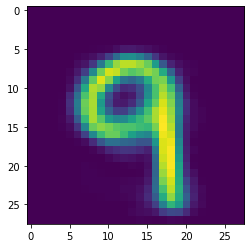

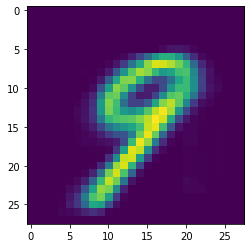

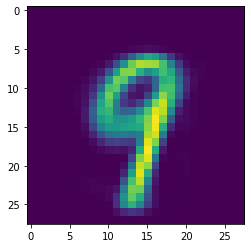

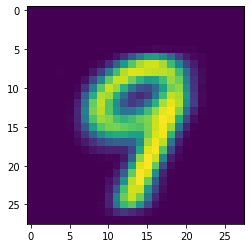

0.907


In [18]:
classifier = Classifier20(n_clusters=10)
classifier.fit(train_x_1[:10000], train_y[:10000])
pred = classifier.predict(test_x_1[:1000])
acc = accuracy_score(pred, test_y[:1000])
print(acc)

In [21]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(train_x_1, train_y)
pred = classifier.predict(test_x_1[:1000])
acc = accuracy_score(pred, test_y[:1000])
print(acc)

0.53


In [22]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(train_x_1, train_y)
pred = classifier.predict(test_x_1[:1000])
acc = accuracy_score(pred, test_y[:1000])
print(acc)

0.811


In [23]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(train_x_1, train_y)
pred = classifier.predict(test_x_1[:1000])
acc = accuracy_score(pred, test_y[:1000])
print(acc)

0.817


In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(train_x_1[:1000], train_y[:1000])
pred = classifier.predict(test_x_1[:1000])
acc = accuracy_score(pred, test_y[:1000])
print(acc)

C:\Users\i00435064\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\i00435064\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.818


In [8]:
from sklearn.metrics import accuracy_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
classifier = LinearDiscriminantAnalysis()
classifier.fit(train_x_1[:10000], train_y[:10000])
pred = classifier.predict(test_x_1[:1000])
acc = accuracy_score(pred, test_y[:1000])
print(acc)

0.823


C:\Users\i00435064\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [9]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifier = QuadraticDiscriminantAnalysis()
classifier.fit(train_x_1[:10000], train_y[:10000])
pred = classifier.predict(test_x_1[:1000])
acc = accuracy_score(pred, test_y[:1000])
print(acc)

C:\Users\i00435064\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.648


In [ ]:
class NaiveClassifier(object):
    def __init__(self):
        self.name = 'Dummy'
    def fit(self, train_x, train_y):
        pass
    def predict(self, test_x):
        return np.random.randint(low=0, high=10, size=len(test_x))
    def predict_proba(self, test_x):
        pass